# *`Mini Project 1- Stock Market Analysis Using Python`*

## Stock Market Analysis

**Business Scenario:** Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. Finance is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. Here, we will analyze data from the stock market for some technology stocks such as Apple, Google, Amazon, and Microsoft.

**Objective:** Use Python libraries such as Pandas, Seaborn, and Matplotlib to extract and analyze the information, visualize it, and look at different ways to analyze the risk of a stock, based on its performance history.

About the Data: The stocks we have chosen are from various industries and market caps namely,
* Apple
* Google
* Microsoft
* Amazon

In [1]:
!pip install yfinance

In [79]:
# Make necessary imports
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
sns.reset_orig()

In [179]:
# Let's get the data in a Pandas DataFrame
start = "2015-01-01"
end = '2023-12-31'

amazon=yf.download('AMZN',start,end)
google=yf.download('GOOGL',start,end)
apple=yf.download('AAPL',start,end)
microsoft=yf.download('MSFT',start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [181]:
# Lets view the data
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,15.6290,15.7375,15.3480,15.4260,15.4260,55664000
2015-01-05,15.3505,15.4190,15.0425,15.1095,15.1095,55484000
2015-01-06,15.1120,15.1500,14.6190,14.7645,14.7645,70380000
2015-01-07,14.8750,15.0640,14.7665,14.9210,14.9210,52806000
2015-01-08,15.0160,15.1570,14.8055,15.0230,15.0230,61768000


In [182]:
google.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,26.629999,26.790001,26.393999,26.477501,26.477501,26480000
2015-01-05,26.357500,26.399500,25.887501,25.973000,25.973000,41182000
2015-01-06,26.025000,26.060499,25.277500,25.332001,25.332001,54456000
2015-01-07,25.547501,25.574499,25.182501,25.257500,25.257500,46918000
2015-01-08,25.075500,25.375000,24.750999,25.345501,25.345501,73054000


In [183]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.435268,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.746889,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.749126,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.082136,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.007429,237458000


In [184]:
microsoft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998,40.378063,27913900
2015-01-05,46.369999,46.730000,46.250000,46.330002,40.006771,39673900
2015-01-06,46.380001,46.750000,45.540001,45.650002,39.419559,36447900
2015-01-07,45.980000,46.459999,45.490002,46.230000,39.920414,29114100
2015-01-08,46.750000,47.750000,46.720001,47.590000,41.094791,29645200


In [185]:
# Check the data type of the data
amazon.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2264 non-null   float64
 1   High       2264 non-null   float64
 2   Low        2264 non-null   float64
 3   Close      2264 non-null   float64
 4   Adj Close  2264 non-null   float64
 5   Volume     2264 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 123.8 KB


In [186]:
# How big is the data?
amazon.shape

(2264, 6)

In [187]:
# How does the data look like?
amazon.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-20,78.059998,78.059998,75.804497,76.374496,76.374496,110832000
2016-02-25,27.775999,27.969500,27.264500,27.757500,27.757500,90510000
2022-06-27,117.089996,117.980003,112.699997,113.220001,113.220001,62133200
2015-10-20,28.600000,28.650000,27.764000,28.044001,28.044001,86924000
2019-09-20,91.085503,91.531502,89.045998,89.708000,89.708000,106838000


In [188]:
# How does the data look mathematically?
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,91.980237,93.048392,90.813574,91.950540,91.950540,8.005899e+07
std,48.697243,49.303374,48.034871,48.654536,48.654536,4.063687e+07
min,14.314000,14.539500,14.262500,14.347500,14.347500,1.762600e+07
25%,44.243750,44.635250,44.126499,44.303625,44.303625,5.390508e+07
50%,90.728249,91.489498,89.867252,90.691998,90.691998,6.862200e+07
75%,133.395000,134.802494,131.811623,133.230000,133.230000,9.332950e+07
max,187.199997,188.654007,184.839493,186.570496,186.570496,4.771220e+08


In [189]:
google.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,73.656450,74.445139,72.891596,73.688577,73.688577,3.603382e+07
std,35.845056,36.275127,35.435634,35.857693,35.857693,1.730413e+07
min,24.962000,25.014000,24.545500,24.853001,24.853001,9.312000e+06
25%,42.795499,43.024624,42.516251,42.834501,42.834501,2.574700e+07
50%,60.042002,60.487499,59.559250,60.177750,60.177750,3.164700e+07
75%,103.998877,105.370750,102.866253,104.379375,104.379375,4.074950e+07
max,151.250000,151.546494,148.899002,149.838501,149.838501,2.571620e+08


In [190]:
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,83.956509,84.876609,83.092088,84.026440,82.058687,1.237607e+08
std,55.979856,56.611354,55.396020,56.034699,56.447625,6.818458e+07
min,22.500000,22.917500,22.367500,22.584999,20.772152,2.404830e+07
25%,35.452501,35.651249,35.243749,35.439376,33.082379,7.831732e+07
50%,54.039999,54.740000,53.270000,53.868752,51.638680,1.056556e+08
75%,141.444996,143.274998,139.239998,141.710003,140.151669,1.486811e+08
max,198.020004,199.619995,197.000000,198.110001,197.857529,6.488252e+08


In [191]:
microsoft.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2264.000000,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,161.753132,163.374165,160.085459,161.810848,156.531267,2.980225e+07
std,100.227285,101.263636,99.153547,100.259278,100.957676,1.356061e+07
min,40.340000,40.740002,39.720001,40.290001,34.886101,7.425600e+06
25%,65.389999,65.740000,64.949997,65.450001,59.954021,2.147155e+07
50%,134.970001,136.099998,133.560005,135.220001,129.191330,2.652015e+07
75%,250.894997,253.617504,248.102505,251.730000,247.218777,3.383060e+07
max,383.760010,384.299988,378.160004,382.700012,381.993622,1.691640e+08


In [192]:
# Check for null values
print(f'Amazon data NULL count:\n{amazon.isnull().sum()}\n')
print(f'\nGoogle data NULL count:\n{google.isnull().sum()}\n')
print(f'\nApple data NULL count:\n{apple.isnull().sum()}\n')
print(f'\nMicrosoft data NULL count:\n{microsoft.isnull().sum()}')

Amazon data NULL count:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Google data NULL count:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Apple data NULL count:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Microsoft data NULL count:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [193]:
# Check for duplicates
print(f'Amazon data duplicates count: {amazon.duplicated().sum()}')
print(f'Google data duplicates count: {google.duplicated().sum()}')
print(f'Apple data duplicates count: {apple.duplicated().sum()}')
print(f'Microsoft data duplicates count: {microsoft.duplicated().sum()}')

Amazon data duplicates count: 0
Google data duplicates count: 0
Apple data duplicates count: 0
Microsoft data duplicates count: 0


In [194]:
# Check the correlation of columns
amazon.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999736,0.999681,0.999352,0.999352,-0.069155
High,0.999736,1.000000,0.999615,0.999696,0.999696,-0.063295
Low,0.999681,0.999615,1.000000,0.999712,0.999712,-0.077458
Close,0.999352,0.999696,0.999712,1.000000,1.000000,-0.070595
Adj Close,0.999352,0.999696,0.999712,1.000000,1.000000,-0.070595
Volume,-0.069155,-0.063295,-0.077458,-0.070595,-0.070595,1.000000


## Let's analyze the data for various Stocks, we will perform analysis across  companies





### Calculate the change in stock price

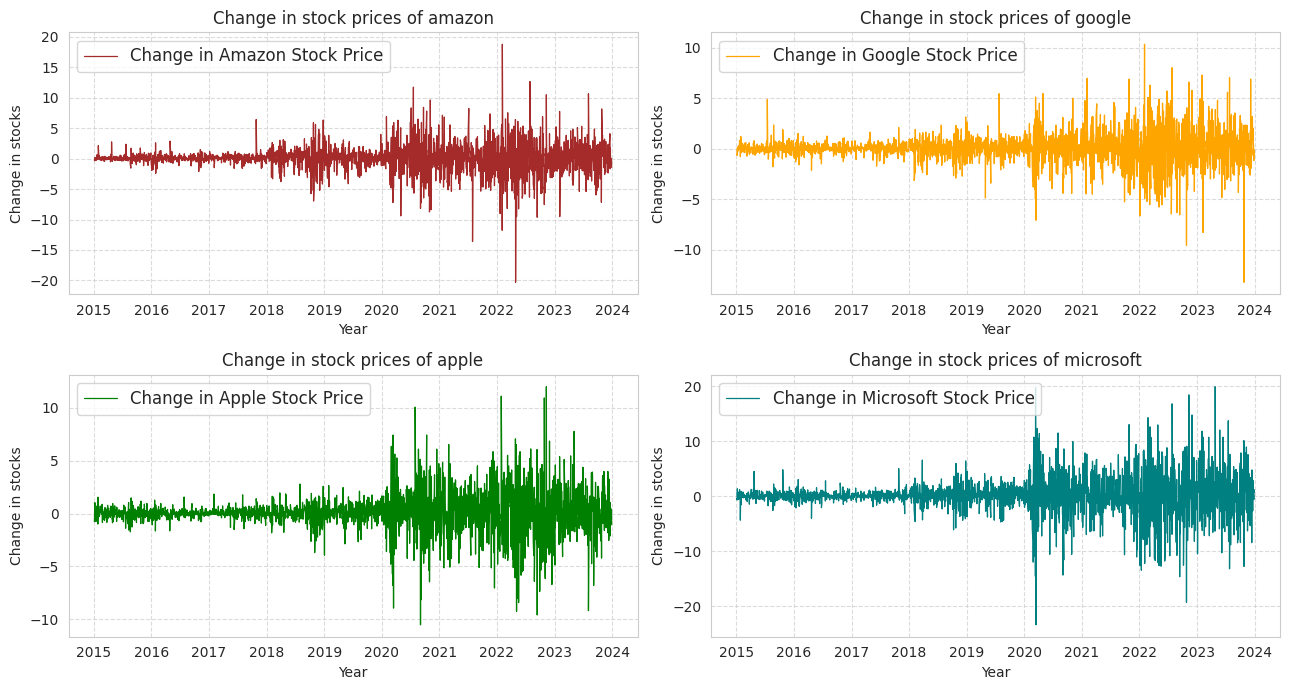

In [341]:
stocks = [amazon, google, apple, microsoft]
names = ["Amazon", "Google", "Apple", "Microsoft"]
# Calculate the change in stock price and plot for each stock
plt.figure(figsize=(13, 7))
for i, (stock, color) in enumerate(zip(stocks, ['brown', 'orange', 'green', 'teal']), 1):
    plt.subplot(2, 2, i)
    plt.plot(stock.index, stock['Close'].diff(), color=color, linewidth=0.9)
    plt.title(f'Change in stock prices of {names[i-1].lower()}')
    plt.xlabel('Year')
    plt.ylabel('Change in stocks')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend([f'Change in {names[i-1]} Stock Price'], loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()


### What was the volume traded over time for each stocks?

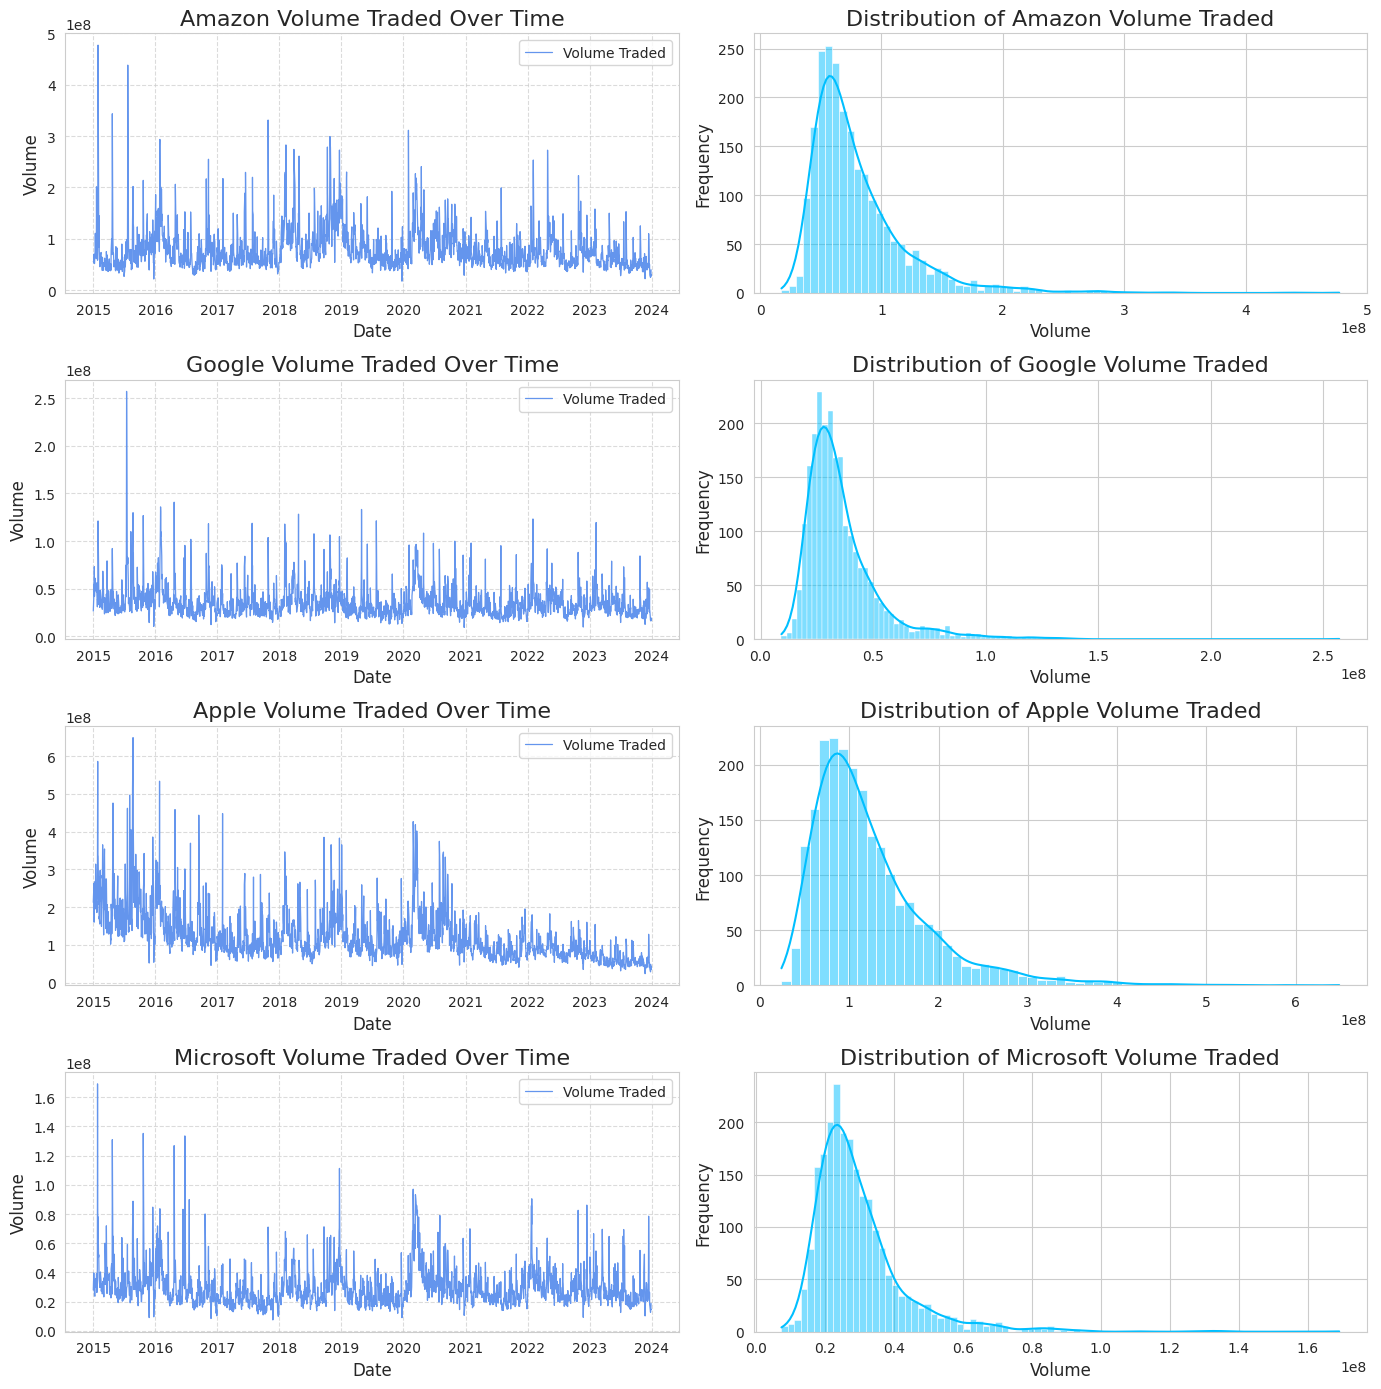

In [323]:
# Plot the volume being traded over time and its distribution for each stock
fig, axs = plt.subplots(4, 2, figsize=(14, 14))
name = ['Amazon', 'Google', 'Apple', 'Microsoft']

for i, stock in enumerate(stocks):
    # Line chart
    axs[i, 0].plot(stock.index, stock['Volume'], color='cornflowerblue', linestyle='-', linewidth=0.9)
    axs[i, 0].set_title(f'{name[i]} Volume Traded Over Time', fontsize=16)
    axs[i, 0].set_xlabel('Date', fontsize=12)
    axs[i, 0].set_ylabel('Volume', fontsize=12)
    axs[i, 0].grid(True, linestyle='--', alpha=0.7)
    axs[i, 0].tick_params(axis='x', labelsize=10)
    axs[i, 0].tick_params(axis='y', labelsize=10)
    axs[i, 0].legend(['Volume Traded'], loc='upper right', fontsize=10)

    # Histogram
    sns.histplot(data=stock['Volume'], ax=axs[i, 1], color='deepskyblue', kde=True)
    axs[i, 1].set_title(f'Distribution of {name[i]} Volume Traded', fontsize=16)
    axs[i, 1].set_xlabel('Volume', fontsize=12)
    axs[i, 1].set_ylabel('Frequency', fontsize=12)
    axs[i, 1].tick_params(axis='x', labelsize=10)
    axs[i, 1].tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()


### What was the moving average for the various stocks

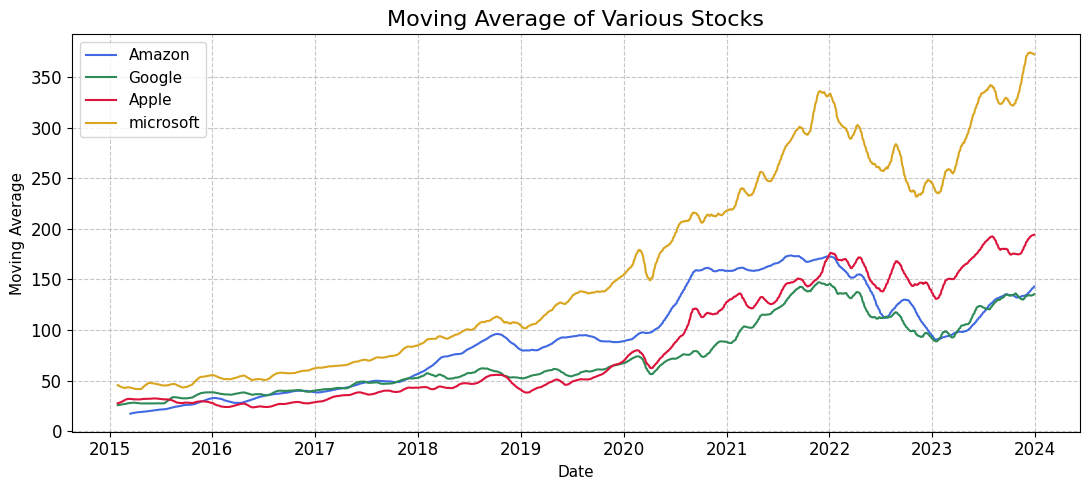

In [197]:
# Define the window size for the moving average
window_size = 20

# Calculate the moving average for each stock
amazon['Moving Average'] = amazon['Close'].rolling(50).mean()
google['Moving Average'] = google['Close'].rolling(window=window_size).mean()
apple['Moving Average'] = apple['Close'].rolling(window=window_size).mean()
microsoft['Moving Average'] = microsoft['Close'].rolling(window=window_size).mean()

# Plot the moving average for each stock
plt.figure(figsize=(11, 5))
sns.lineplot(x = amazon.index, y = amazon['Moving Average'], data = amazon, label='Amazon', color='royalblue', linewidth=1.5, alpha=1)
sns.lineplot(x = google.index, y = google['Moving Average'], data = google, label='Google', color='seagreen', linewidth=1.5, alpha=1)
sns.lineplot(x = apple.index, y = apple['Moving Average'], data = apple, label='Apple', color='crimson', linewidth=1.5, alpha=1)
sns.lineplot(x = microsoft.index, y = microsoft['Moving Average'], data = microsoft, label='microsoft', color='goldenrod', linewidth=1.5, alpha=1)
plt.title('Moving Average of Various Stocks', fontsize=16)
plt.xlabel('Date', fontsize=11)
plt.ylabel('Moving Average', fontsize=11)
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### Calculate the Daily Returns for the stocks

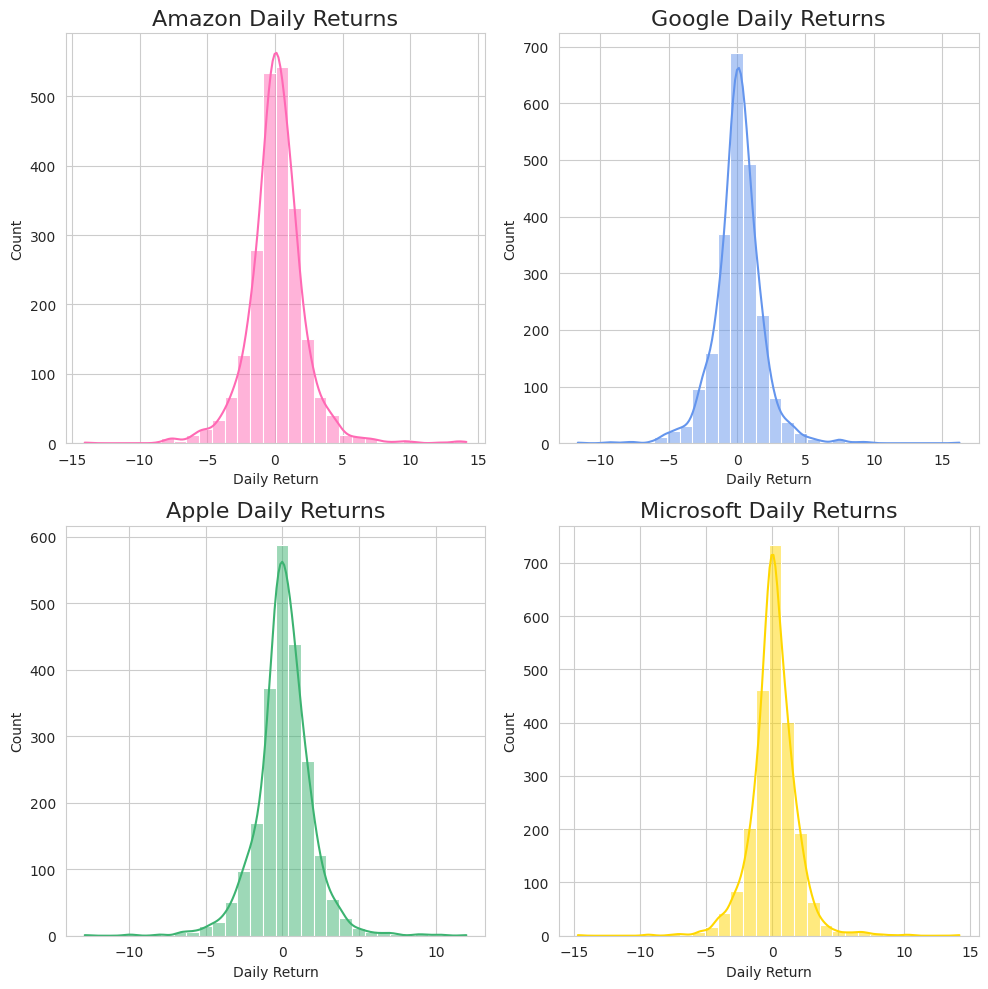

In [342]:
# Calculate daily returns
amazon['Daily Return'] = amazon['Adj Close'].pct_change() * 100
google['Daily Return'] = google['Adj Close'].pct_change() * 100
apple['Daily Return'] = apple['Adj Close'].pct_change() * 100
microsoft['Daily Return'] = microsoft['Adj Close'].pct_change() * 100

# Calculate the average daily return
amazon_average_daily_return = amazon['Daily Return'].mean()
google_average_daily_return = google['Daily Return'].mean()
apple_average_daily_return = apple['Daily Return'].mean()
microsoft_average_daily_return = microsoft['Daily Return'].mean()

# Histogram of daily returns
plt.figure(figsize=(10, 10))
colors = ['hotpink', 'cornflowerblue', 'mediumseagreen', 'gold']
stocks = [amazon, google, apple, microsoft]
titles = ['Amazon', 'Google', 'Apple', 'Microsoft']

for i, (stock, color, title) in enumerate(zip(stocks, colors, titles), 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=stock['Daily Return'], bins=30, kde=True, color=color)
    plt.title(f'{title} Daily Returns', fontsize=16)

plt.tight_layout()
plt.show()


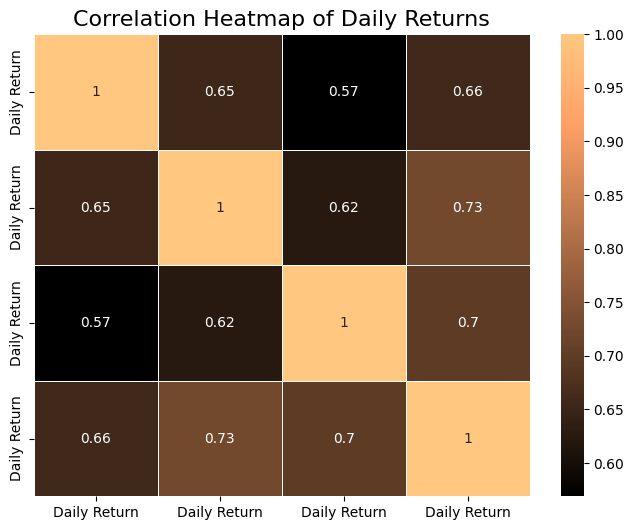

In [238]:
# Correlation Heatmap
correlation_matrix = pd.concat([amazon['Daily Return'], google['Daily Return'], apple['Daily Return'], microsoft['Daily Return']], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='copper', linewidths=0.5)
plt.title('Correlation Heatmap of Daily Returns', fontsize=16)
plt.show()

### Plotting the average Daily Returns

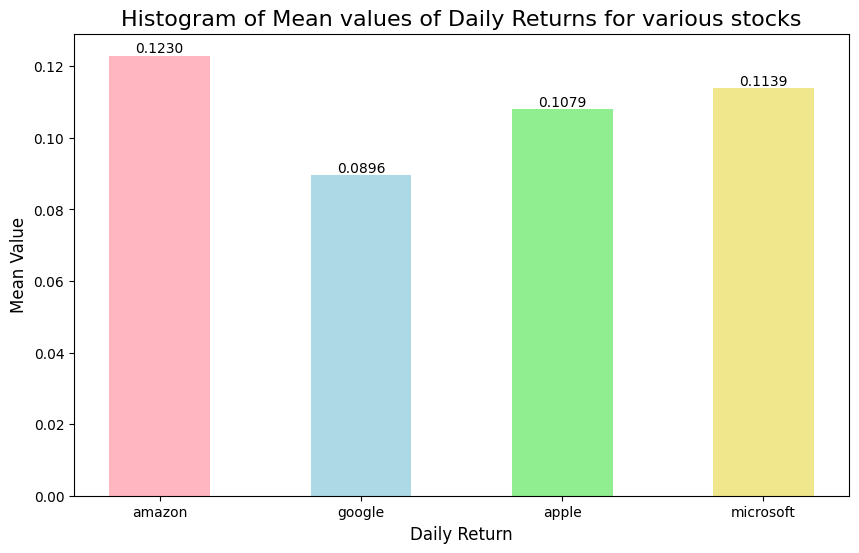

In [239]:
# Barplot of Average Daily Returns
plt.figure(figsize=(10, 6))
bars = plt.bar(['amazon', 'google', 'apple', 'microsoft'],[amazon_average_daily_return, google_average_daily_return, apple_average_daily_return, microsoft_average_daily_return], width = 0.5, color = ['lightpink', 'lightblue', 'lightgreen', 'khaki'])
plt.title('Histogram of Mean values of Daily Returns for various stocks', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)

# Add the average return value at the top of each bar
for bar, value in zip(bars, [amazon_average_daily_return, google_average_daily_return, apple_average_daily_return, microsoft_average_daily_return]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.4f}', ha='center', va='bottom')

plt.show()

In [267]:
amazon['Daily Return'].fillna(0)

Date
2015-01-02    0.000000
2015-01-05   -2.051729
2015-01-06   -2.283333
2015-01-07    1.059974
2015-01-08    0.683602
                ...   
2023-12-22   -0.273010
2023-12-26   -0.006514
2023-12-27   -0.045634
2023-12-28    0.026091
2023-12-29   -0.938846
Name: Daily Return, Length: 2264, dtype: float64

### Perform the trend analysis based on the Daily returns

In [328]:
# Trend Analysis
def trend(value):
  if value > -0.5 and value <= 0.5:
    return 'Slight or No change'
  elif value > 0.5 and value <= 1:
    return 'Slight Positive'
  elif value > -1 and value <= -0.5:
    return 'Slight Negative'
  elif value > 1 and value <= 3:
    return 'Positive'
  elif value > -3 and value <= -1:
    return 'Negative'
  elif value > 3 and value <= 7:
    return 'Among top gainers'
  elif value > -7 and value <= -3:
    return 'Among top losers'
  elif value > 7:
    return 'Bull run'
  elif value <= -7:
    return 'Bear drop'

# Define a list of DataFrames
stocks = [amazon, google, apple, microsoft]

# Apply the trend function to each DataFrame
for stock in stocks:
    stock['Trend'] = stock['Daily Return'].fillna(0).apply(trend)

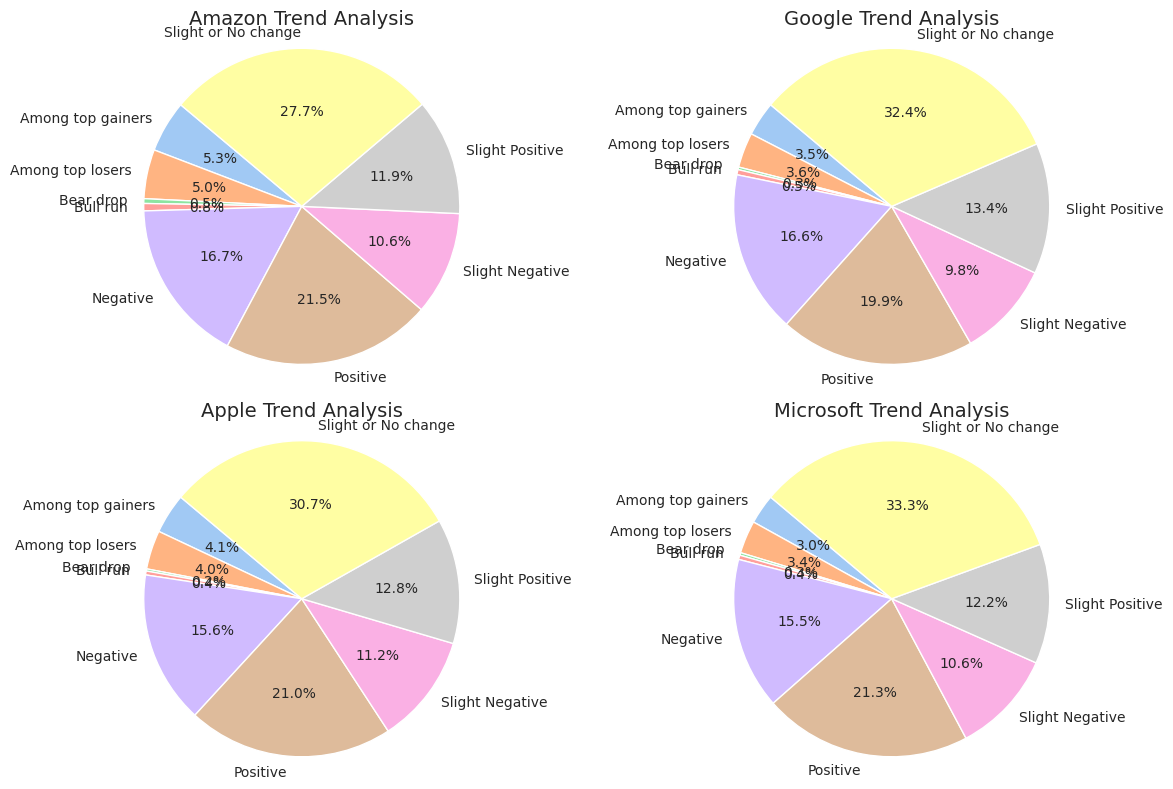

In [332]:
# Group the data by 'Trend' and count occurrences
amazon_pie_data = amazon['Trend'].value_counts().sort_index()
google_pie_data = google['Trend'].value_counts().sort_index()
apple_pie_data = apple['Trend'].value_counts().sort_index()
microsoft_pie_data = microsoft['Trend'].value_counts().sort_index()

# Plotting the pie chart using seaborn
sns.set_palette('pastel')  # Set color palette
sns.set_style('whitegrid')  # Set style

# Define the list of pie data and corresponding titles
pie_data = [amazon_pie_data, google_pie_data, apple_pie_data, microsoft_pie_data]
titles = ["Amazon", "Google", "Apple", "Microsoft"]

# Create subplots for each stock's pie chart
plt.figure(figsize=(12, 8))
for i, (data, title) in enumerate(zip(pie_data, titles), 1):
    plt.subplot(2, 2, i)
    plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.title(f"{title} Trend Analysis", fontsize=14)

# Adjust layout to add space between plots and titles
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


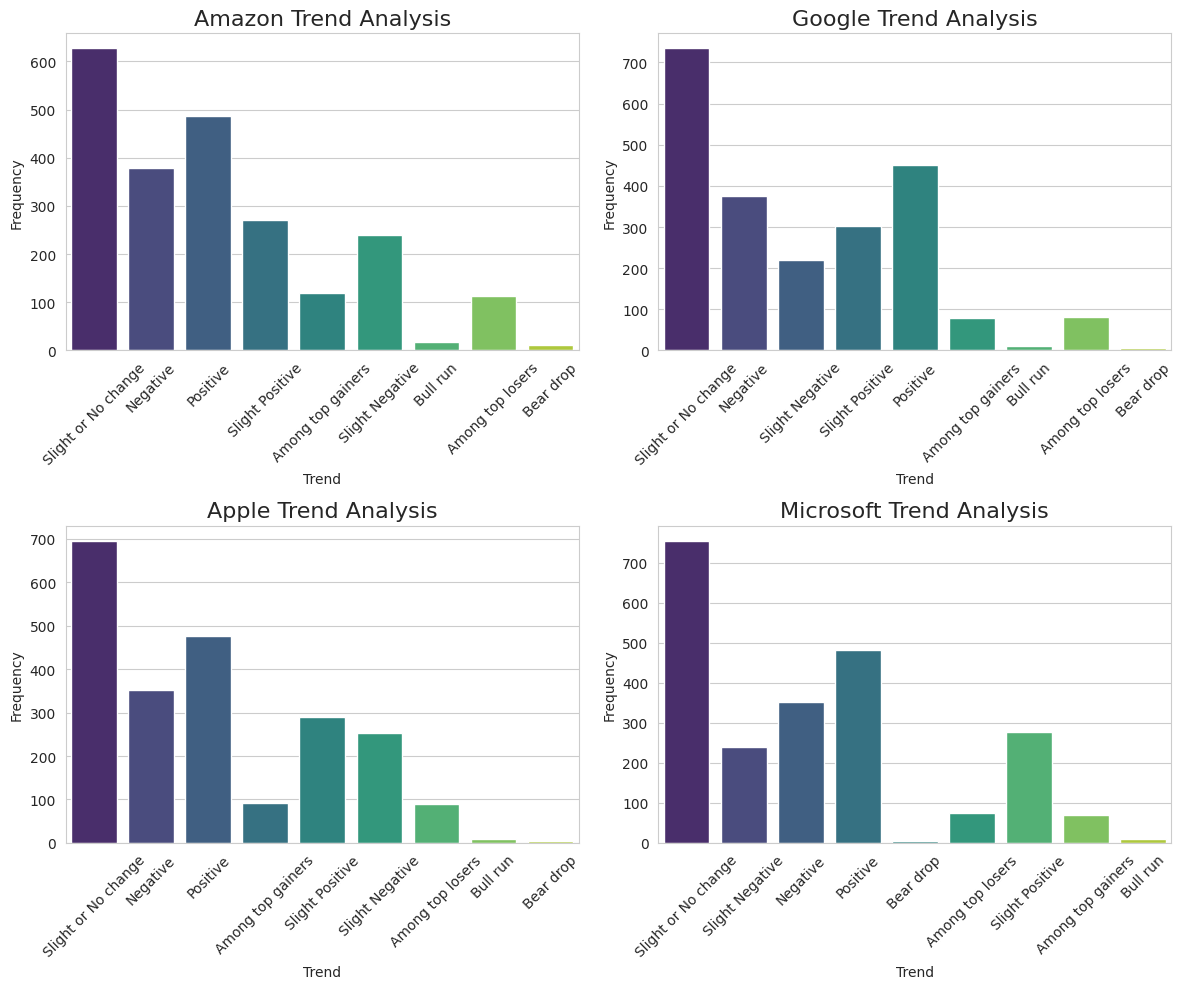

In [331]:
# Define a list of DataFrames and corresponding titles
titles = ["Amazon", "Google", "Apple", "Microsoft"]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot each stock's trend analysis
for i, (stock, title) in enumerate(zip(stocks, titles)):
    row = i // 2
    col = i % 2
    sns.countplot(data=stock, x='Trend', palette='viridis', ax=axes[row, col])
    axes[row, col].set_title(f"{title} Trend Analysis", fontsize=16)
    axes[row, col].set_xlabel("Trend")
    axes[row, col].set_ylabel("Frequency")
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust layout to add space between plots and titles
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.show()

### What was the correlation among the stocks ?

In [291]:
# Calculate the correlation matrix
correlation_matrix = pd.concat([amazon['Daily Return'], google['Daily Return'], apple['Daily Return'], microsoft['Daily Return']], axis=1).corr()

# Print the correlation matrix
print(correlation_matrix)

              Daily Return  Daily Return  Daily Return  Daily Return
Daily Return      1.000000      0.654269      0.569055      0.656816
Daily Return      0.654269      1.000000      0.623689      0.726194
Daily Return      0.569055      0.623689      1.000000      0.695991
Daily Return      0.656816      0.726194      0.695991      1.000000


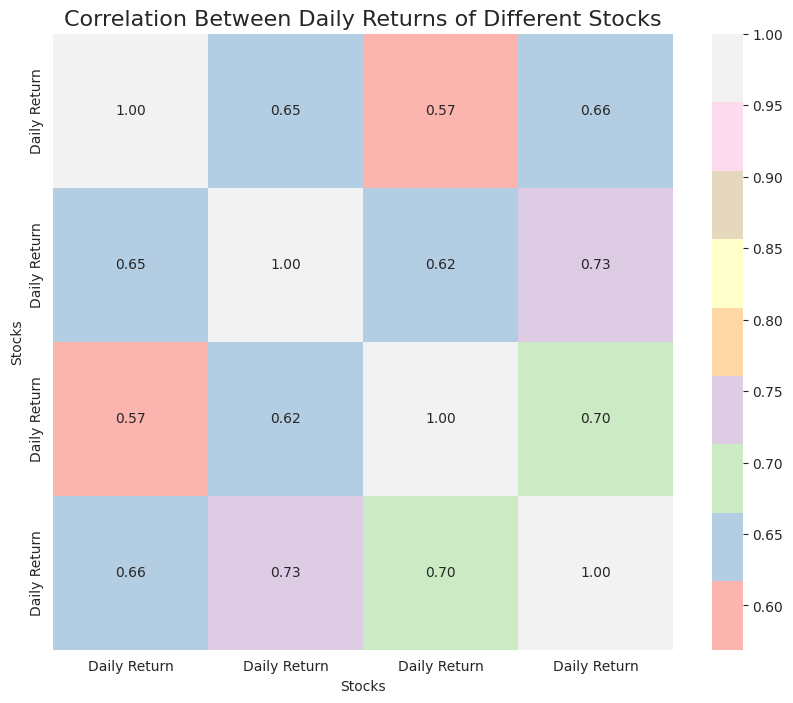

In [343]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', fmt=".2f")
plt.title('Correlation Between Daily Returns of Different Stocks', fontsize = 16)
plt.xlabel('Stocks')
plt.ylabel('Stocks')
plt.show()